## Collab Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd "/content/drive/MyDrive/mir/"

/content/drive/MyDrive/mir


In [3]:
%pip install -r requirements.txt

In [4]:

# Verify GPU Is Visible to TensorFlow
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPUs available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
import pandas as pd

features_path = "/content/drive/MyDrive/mir/temp/raga_features_merged_df.pkl"
raga_features_merged_df = pd.read_pickle(features_path)

print("dataframe Shape:", raga_features_merged_df.shape)
raga_features_merged_df.head()


dataframe Shape: (957, 27)


clip_number                                         audio_path  \
0            1  dataset/shanmugapriya/Mariveradikkevaraiya_Ram...   
1            2  dataset/shanmugapriya/Mariveradikkevaraiya_Ram...   
2            3  dataset/shanmugapriya/Mariveradikkevaraiya_Ram...   
3            4  dataset/shanmugapriya/Mariveradikkevaraiya_Ram...   
4            5  dataset/shanmugapriya/Mariveradikkevaraiya_Ram...   

                                          audio_clip           raga  \
0  [1.0623396e-06, 1.188077e-06, 1.0709643e-06, 2...  shanmugapriya   
1  [-0.10845736, -0.10564807, -0.1011176, -0.1010...  shanmugapriya   
2  [-0.02424642, -0.022455275, -0.020136423, -0.0...  shanmugapriya   
3  [0.009694064, 0.0060057696, 0.0030176903, 0.00...  shanmugapriya   
4  [-0.04330001, -0.04645087, -0.044871897, -0.03...  shanmugapriya   

                   song_name original_sruthi_note  \
0  Mariveradikkevaraiya_Rama                   D3   
1  Mariveradikkevaraiya_Rama                   D3   
2  Mariveradikkevaraiya_Rama                   D3   
3  Mariveradikkevaraiya_Rama                   D3   
4  Mariveradikkevaraiya_Rama                   D3   

   original_sruthi_frequency_hz_f0  original_sruthi_frequency_midi  \
0                       147.258251                       50.050139   
1                       147.258251                       50.050139   
2                       147.258251                       50.050139   
3                       147.258251                       50.050139   
4                       147.258251                       50.050139   

  standardized_sruthi_note  standardized_sruthi_frequency_hz  ...  \
0                       C3                        130.812783  ...   
1                       C3                        130.812783  ...   
2                       C3                        130.812783  ...   
3                       C3                        130.812783  ...   
4                       C3                        130.812783  ...   

                                       f0_derivative  \
0  [nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [1.2823016052888363, 1.2897299029195324, 1.297...   
2  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3  [nan, -1.1998951262152957, 0.598214851417552, ...   
4  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                f0_second_derivative  \
0  [nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.007428297630696079, 0.0074713293210777465, ...   
2  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3  [nan, 1.7981099776328477, -0.598214851417552, ...   
4  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                       gamaka_extent  \
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
4  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                         gamaka_rate  \
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
4  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                    modulation_index  \
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
4  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                 mel_spectrogram_128  \
0  [[-80.0, -75.420876, -61.28331, -63.87583, -54...   
1  [[-46.219173, -44.796753, -40.202065, -40.3552...   
2  [[-28.341854, -25.85256, -25.865564, -27.63400...   
3  [[-29.248377, -28.587976, -34.596325, -28.1784...   
4  [[-29.094143, -29.47323, -30.63556, -3

from matplotlib import pyplot as plt
_df_0['clip_number'].plot(kind='hist', bins=20, title='clip_number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['clip_number']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'clip_number'}, axis=1)
              .sort_values('clip_number', ascending=True))
  xs = counted['clip_number']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('clip_number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('clip_number')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['original_sruthi_frequency_hz_f0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'original_sruthi_frequency_hz_f0'}, axis=1)
              .sort_values('original_sruthi_frequency_hz_f0', ascending=True))
  xs = counted['original_sruthi_frequency_hz_f0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('original_sruthi_frequency_hz_f0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('original_sruthi_frequency_hz_f0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['original_sruthi_frequency_midi']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'original_sruthi_frequency_midi'}, axis=1)
              .sort_values('original_sruthi_frequency_midi', ascending=True))
  xs = counted['original_sruthi_frequency_midi']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('original_sruthi_frequency_midi', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('original_sruthi_frequency_midi')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['standardized_sruthi_frequency_hz']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'standardized_sruthi_frequency_hz'}, axis=1)
              .sort_values('standardized_sruthi_frequency_hz', ascending=True))
  xs = counted['standardized_sruthi_frequency_hz']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('standardized_sruthi_frequency_hz', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('standardized_sruthi_frequency_hz')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['clip_number'].plot(kind='line', figsize=(8, 4), title='clip_number')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['clip_number'].plot(kind='hist', bins=20, title='clip_number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='clip_number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['clip_number']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'clip_number'}, axis=1)
              .sort_values('clip_number', ascending=True))
  xs = counted['clip_number']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('clip_number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('clip_number')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['original_sruthi_frequency_hz_f0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'original_sruthi_frequency_hz_f0'}, axis=1)
              .sort_values('original_sruthi_frequency_hz_f0', ascending=True))
  xs = counted['original_sruthi_frequency_hz_f0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('original_sruthi_frequency_hz_f0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('original_sruthi_frequency_hz_f0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['original_sruthi_frequency_midi']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'original_sruthi_frequency_midi'}, axis=1)
              .sort_values('original_sruthi_frequency_midi', ascending=True))
  xs = counted['original_sruthi_frequency_midi']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('original_sruthi_frequency_midi', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('original_sruthi_frequency_midi')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['clip_number'].plot(kind='line', figsize=(8, 4), title='clip_number')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
raga_features_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   clip_number                         957 non-null    int64  
 1   audio_path                          957 non-null    object 
 2   audio_clip                          957 non-null    object 
 3   raga                                957 non-null    object 
 4   song_name                           957 non-null    object 
 5   original_sruthi_note                957 non-null    object 
 6   original_sruthi_frequency_hz_f0     957 non-null    float64
 7   original_sruthi_frequency_midi      957 non-null    float64
 8   standardized_sruthi_note            957 non-null    object 
 9   standardized_sruthi_frequency_hz    957 non-null    float64
 10  standardized_sruthi_frequency_midi  957 non-null    float64
 11  sampling_rate                       957 non-n

## EDA Codes

In [2]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Digital Signal Processing
import librosa

# For Summaries
from scipy.stats import median_abs_deviation
import numpy.ma as ma

# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the Feature Dataset
features_path = "/content/drive/MyDrive/mir/temp/raga_features_merged_df.pkl"
df = pd.read_pickle(features_path)

print("dataframe Shape:", df.shape)

dataframe Shape: (957, 27)


### Creation of Reference Freqeuncies to Carnatic Music

In [4]:
# -----------------------------------------
# Helper: Western Note → Carnatic Swara Map
# (assuming C = Sa, and standard 12-tone equal temperament)
# -----------------------------------------
western_to_carnatic = {
                        "C":  "Sa",
                        "C#": "Ri-1",
                        "Db": "Ri-1",
                        "D":  "Ri-2",
                        "D#": "Ga-1",
                        "Eb": "Ga-1",
                        "E":  "Ga-2",
                        "F":  "Ma-1",
                        "F#": "Ma-2",
                        "Gb": "Ma-2",
                        "G":  "Pa",
                        "G#": "Dha-1",
                        "Ab": "Dha-1",
                        "A":  "Dha-2",
                        "A#": "Ni-1",
                        "Bb": "Ni-1",
                        "B":  "Ni-2"
                    }

# -----------------------------------------
# Helper: Compute frequency from MIDI
# -----------------------------------------
def midi_to_freq(midi):
    return 440.0 * (2 ** ((midi - 69) / 12))

# -----------------------------------------
# Helper: Convert MIDI → Western Note Name
# -----------------------------------------
def midi_to_note_name(midi):
    note_names = ["C", "C#", "D", "D#", "E", "F",
                  "F#", "G", "G#", "A", "A#", "B"]
    octave = (midi // 12) - 1
    note = note_names[midi % 12]
    return f"{note}{octave}", note

# -----------------------------------------
# Helper: Determine Sthayi
# (C3 = Sa in Mandra Sthayi, C4 = Sa in Madhya, C5 = Sa in Tara)
# -----------------------------------------
def get_sthayi(midi):
    if midi < 60:
        return "Mandra"
    elif midi < 72:
        return "Madhya"
    else:
        return "Tāra"

# -----------------------------------------
# Build the table for MIDI 48 → 72
# (C3 → C5) which covers all your raga pitch ranges
# -----------------------------------------
rows = []

for midi in range(48, 73):   # 48 to 72 (inclusive)
    freq = midi_to_freq(midi)
    full_note, base_note = midi_to_note_name(midi)
    carnatic = western_to_carnatic[base_note]
    sthayi = get_sthayi(midi)

    rows.append({
                  "Frequency (Hz)": round(freq, 2),
                  "MIDI": midi,
                  "Western Note": full_note,
                  "Carnatic Swara": carnatic,
                  "Sthayi": sthayi
              })

In [5]:
pitch_reference_df = pd.DataFrame(rows)

pitch_reference_df

Frequency (Hz)  MIDI Western Note Carnatic Swara  Sthayi
0           130.81    48           C3             Sa  Mandra
1           138.59    49          C#3           Ri-1  Mandra
2           146.83    50           D3           Ri-2  Mandra
3           155.56    51          D#3           Ga-1  Mandra
4           164.81    52           E3           Ga-2  Mandra
5           174.61    53           F3           Ma-1  Mandra
6           185.00    54          F#3           Ma-2  Mandra
7           196.00    55           G3             Pa  Mandra
8           207.65    56          G#3          Dha-1  Mandra
9           220.00    57           A3          Dha-2  Mandra
10          233.08    58          A#3           Ni-1  Mandra
11          246.94    59           B3           Ni-2  Mandra
12          261.63    60           C4             Sa  Madhya
13          277.18    61          C#4           Ri-1  Madhya
14          293.66    62           D4           Ri-2  Madhya
15          311.13    63          D#4           Ga-1  Madhya
16          329.63    64           E4           Ga-2  Madhya
17          349.23    65           F4           Ma-1  Madhya
18          369.99    66          F#4           Ma-2  Madhya
19          392.00    67           G4             Pa  Madhya
20          415.30    68          G#4          Dha-1  Madhya
21          440.00    69           A4          Dha-2  Madhya
22          466.16    70          A#4           Ni-1  Madhya
23          493.88    71           B4           Ni-2  Madhya
24          523.25    72           C5             Sa    Tāra

### 1. Based on Pitch Details from the audio

#### Distribution of f0 in Hz across Ragas

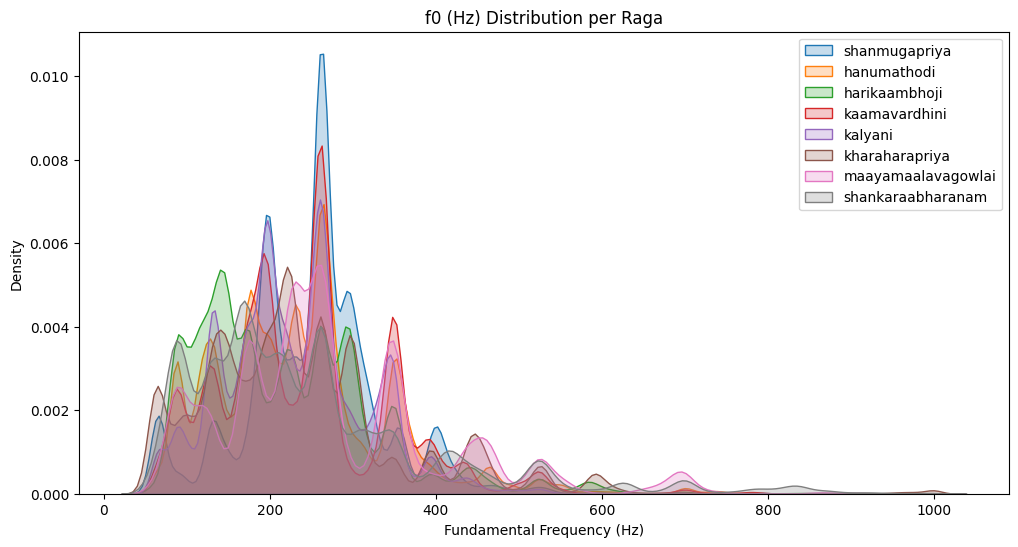

In [6]:
plt.figure(figsize=(12,6))

for raga in df["raga"].unique():
    values = []
    for seq in df[df.raga == raga]["f0_hz"]:
        arr = np.array(eval(seq)) if isinstance(seq, str) else np.array(seq)
        arr = arr[~np.isnan(arr)]
        values.extend(arr)

    sns.kdeplot(values, label=raga, fill=True, alpha=0.25)

plt.title("f0 (Hz) Distribution per Raga")
plt.xlabel("Fundamental Frequency (Hz)")
plt.ylabel("Density")
plt.legend()
plt.show()


#### Pitch class distribution
Characteristic Swara Usage Patterns

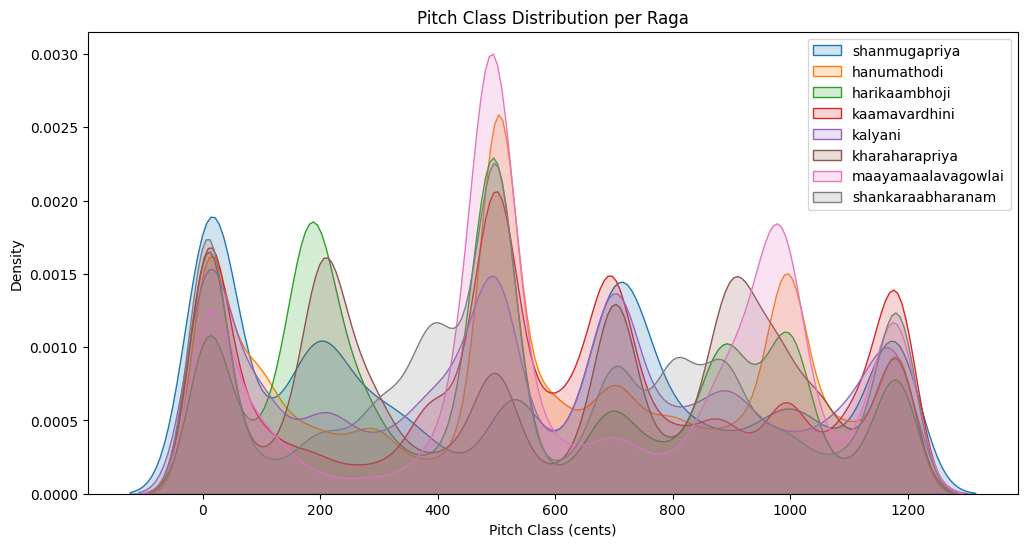

In [7]:
plt.figure(figsize=(12,6))

for raga in df["raga"].unique():
    values = []
    for seq in df[df.raga == raga]["pitch_class"]:
        arr = np.array(eval(seq)) if isinstance(seq, str) else np.array(seq)
        arr = arr[~np.isnan(arr)]
        values.extend(arr)

    sns.kdeplot(values, label=raga, fill=True, alpha=0.2)

plt.title("Pitch Class Distribution per Raga")
plt.xlabel("Pitch Class (cents)")
plt.ylabel("Density")
plt.legend()
plt.show()


#### Median Pitch Contour Shape
Average Melodic Behaviour

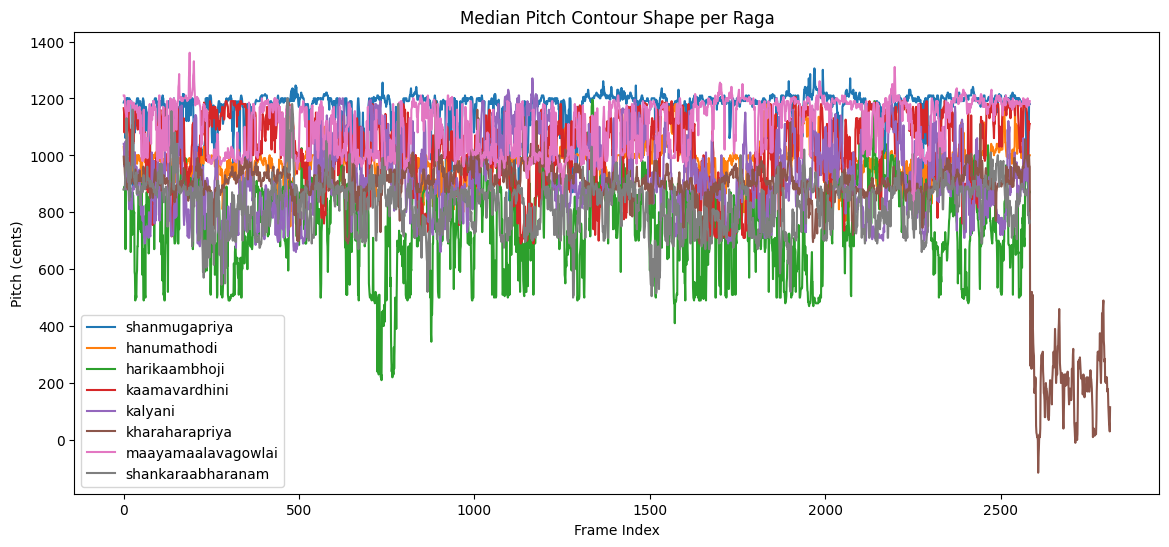

In [8]:
plt.figure(figsize=(14,6))

for raga in df["raga"].unique():
    raga_rows = df[df.raga == raga]

    contours = []
    for seq in raga_rows["f0_cents"]:
        arr = np.array(eval(seq)) if isinstance(seq, str) else np.array(seq)
        contours.append(arr)

    # Pad to same length
    max_len = max(len(x) for x in contours)
    padded = np.array([np.pad(x, (0, max_len - len(x)), constant_values=np.nan) for x in contours])

    median_curve = np.nanmedian(padded, axis=0)

    plt.plot(median_curve, label=raga)

plt.title("Median Pitch Contour Shape per Raga")
plt.xlabel("Frame Index")
plt.ylabel("Pitch (cents)")
plt.legend()
plt.show()


In [12]:

summary = []

for raga in df["raga"].unique():
    f0_all = []
    intervals = []
    mod = []

    for _, row in df[df.raga == raga].iterrows():
        f0 = np.array(eval(row["f0_hz"])) if isinstance(row["f0_hz"], str) else row["f0_hz"]
        ints = np.array(eval(row["interval_sequence"])) if isinstance(row["interval_sequence"], str) else row["interval_sequence"]
        mi = np.array(eval(row["modulation_index"])) if isinstance(row["modulation_index"], str) else row["modulation_index"]

        f0 = f0[~np.isnan(f0)]
        ints = ints[~np.isnan(ints)]
        mi = mi[~np.isnan(mi)]

        f0_all.extend(f0)
        intervals.extend(ints)
        mod.extend(mi)

    summary.append({
        "raga": raga,
        "mean_f0": np.mean(f0_all),
        "std_f0": np.std(f0_all),
        "mean_interval": np.mean(intervals),
        "std_interval": np.std(intervals),
        "mean_modulation_index": np.mean(mod),
        "std_modulation_index": np.std(mod),
    })

pitch_summary_df = pd.DataFrame(summary)
pitch_summary_df


raga     mean_f0      std_f0  mean_interval  std_interval  \
0       shanmugapriya  251.783891   84.617497      -0.631596     30.225675   
1         hanumathodi  237.628607  107.249617      -0.701516     34.829835   
2       harikaambhoji  222.145095  112.490847      -0.194457     30.610339   
3       kaamavardhini  242.229531  106.145482      -0.811195     32.318238   
4             kalyani  229.624331   84.919508      -1.126900     32.566775   
5      kharaharapriya  238.248658  126.882470      -0.753274     32.760987   
6  maayamaalavagowlai  271.506910  136.512556      -0.775988     31.275412   
7   shankaraabharanam  248.790684  154.917325      -0.931456     30.197296   

   mean_modulation_index  std_modulation_index  
0           3.888741e+05          1.349776e+07  
1           1.081233e+06          2.452599e+07  
2           1.408773e+05          6.879129e+06  
3           5.155394e+05          1.597415e+07  
4           2.288227e+06          3.664977e+07  
5           2.387077e+05          1.444526e+07  
6           7.598726e+05          1.872423e+07  
7           1.562097e+06          2.960404e+07

### 2. Gamaka Strength Distributions (Extent, Rate, Modulation Index)
How strong Gamakas differ across Ragas

#### UDF for Gamaka EDA

In [14]:
def safe_array(x):
    """Convert stored array (string or list) into np array"""
    if isinstance(x, str):
        try:
            return np.array(eval(x))
        except:
            return np.array([])
    return np.array(x)


#### KDE Distribution of Gamaka Extent
Shows Which Raga has Wide Gamaka

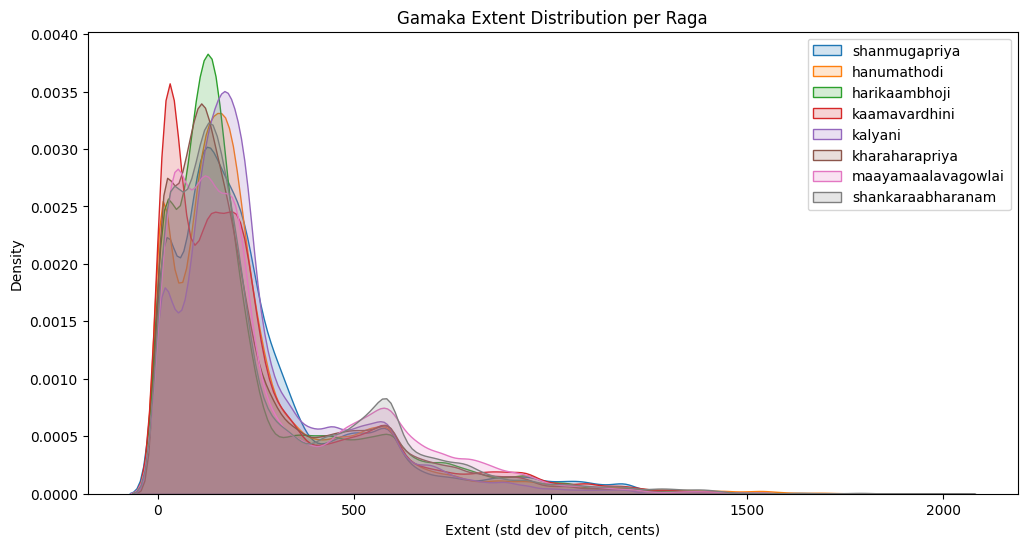

In [9]:
# Gamaka Extent
plt.figure(figsize=(12,6))

for raga in df["raga"].unique():
    vals = []
    for seq in df[df.raga == raga]["gamaka_extent"]:
        arr = np.array(eval(seq)) if isinstance(seq, str) else np.array(seq)
        arr = arr[~np.isnan(arr)]
        vals.extend(arr)

    sns.kdeplot(vals, label=raga, fill=True, alpha=0.2)

plt.title("Gamaka Extent Distribution per Raga")
plt.xlabel("Extent (std dev of pitch, cents)")
plt.legend()
plt.show()


#### KDE Distribution of Gamaka Rate
Shows Which Raga has fast Oscillation

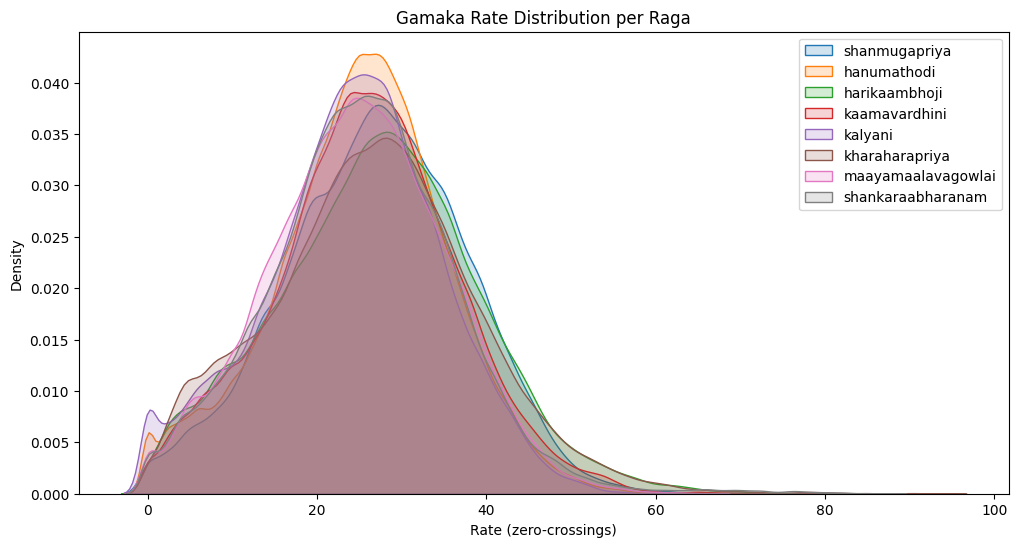

In [10]:
# Gamaka Rate
plt.figure(figsize=(12,6))

for raga in df["raga"].unique():
    vals = []
    for seq in df[df.raga == raga]["gamaka_rate"]:
        arr = np.array(eval(seq)) if isinstance(seq, str) else np.array(seq)
        arr = arr[~np.isnan(arr)]
        vals.extend(arr)

    sns.kdeplot(vals, label=raga, fill=True, alpha=0.2)

plt.title("Gamaka Rate Distribution per Raga")
plt.xlabel("Rate (zero-crossings)")
plt.legend()
plt.show()


#### KDE Distribution of Gamaka Index
Shows Which Raga has heavy Kampita

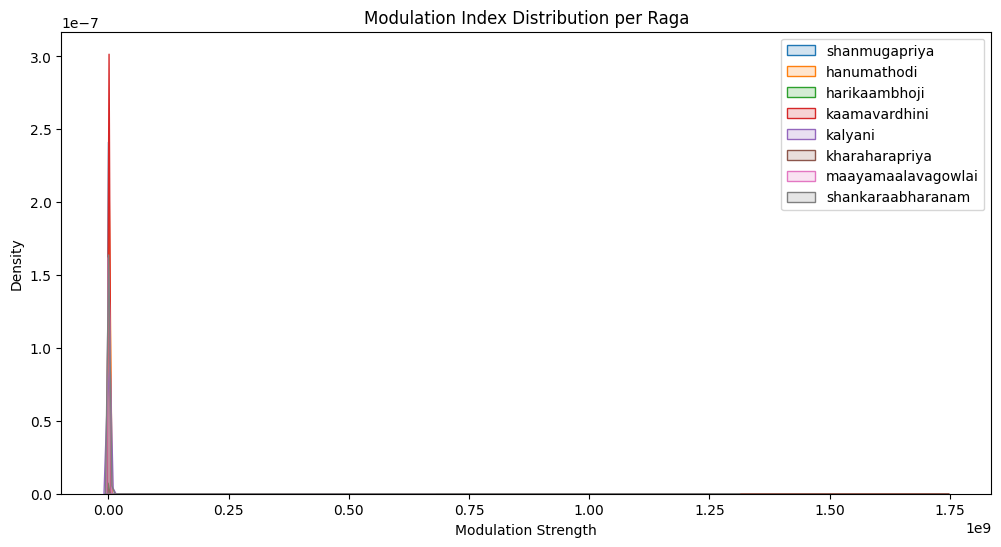

In [11]:
# Modulation Index
plt.figure(figsize=(12,6))

for raga in df["raga"].unique():
    vals = []
    for seq in df[df.raga == raga]["modulation_index"]:
        arr = np.array(eval(seq)) if isinstance(seq, str) else np.array(seq)
        arr = arr[~np.isnan(arr)]
        vals.extend(arr)

    sns.kdeplot(vals, label=raga, fill=True, alpha=0.2)

plt.title("Modulation Index Distribution per Raga")
plt.xlabel("Modulation Strength")
plt.legend()
plt.show()


#### Median Gamaka curves (per-raga trend analysis)
Shows how oscillation changes over a duration of the clip

/tmp/ipython-input-4112239846.py:16: RuntimeWarning: All-NaN slice encountered
  median_curve = np.nanmedian(padded, axis=0)


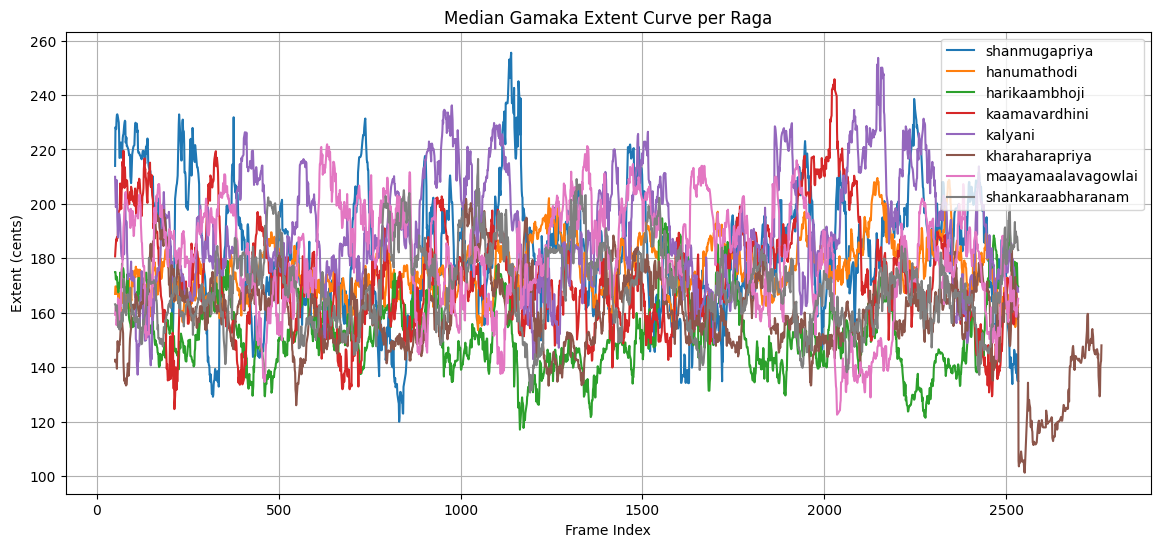

In [15]:
plt.figure(figsize=(14,6))

for raga in df["raga"].unique():
    curves = []
    for arr in df[df.raga == raga]["gamaka_extent"]:
        x = safe_array(arr)
        curves.append(x)

    # align lengths
    max_len = max(len(c) for c in curves)
    padded = np.array([
        np.pad(c, (0, max_len - len(c)), constant_values=np.nan)
        for c in curves
    ])

    median_curve = np.nanmedian(padded, axis=0)
    plt.plot(median_curve, label=raga)

plt.title("Median Gamaka Extent Curve per Raga")
plt.xlabel("Frame Index")
plt.ylabel("Extent (cents)")
plt.legend()
plt.grid(True)
plt.show()


#### Joint Distribution Plots (Extent vs Rate)
This reveals Gamaka Personality of each Raga

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


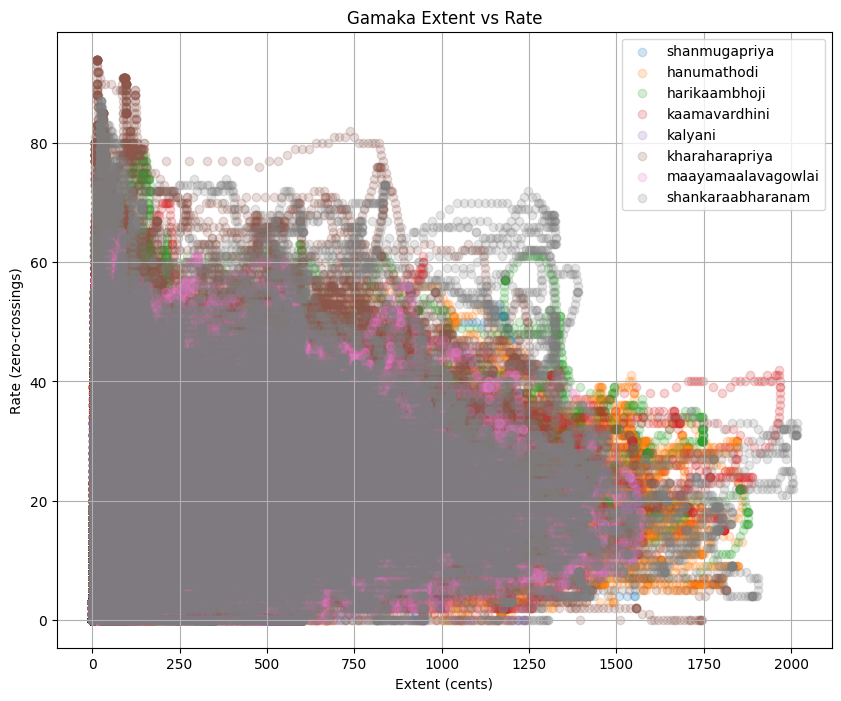

In [16]:
plt.figure(figsize=(10,8))

for raga in df["raga"].unique():
    ext_vals = []
    rate_vals = []

    for _, row in df[df.raga == raga].iterrows():
        ext = safe_array(row["gamaka_extent"])
        rate = safe_array(row["gamaka_rate"])

        # keep only valid overlapping frames
        n = min(len(ext), len(rate))
        ext_vals.extend(ext[:n])
        rate_vals.extend(rate[:n])

    plt.scatter(ext_vals, rate_vals, alpha=0.2, label=raga)

plt.title("Gamaka Extent vs Rate")
plt.xlabel("Extent (cents)")
plt.ylabel("Rate (zero-crossings)")
plt.legend()
plt.grid(True)
plt.show()


#### SUMMARY STATISTICS TABLE PER RAGA

In [17]:
summary = []

for raga in df["raga"].unique():
    ext, rate, mod = [], [], []

    for _, row in df[df.raga == raga].iterrows():
        ext_arr = safe_array(row["gamaka_extent"])
        rate_arr = safe_array(row["gamaka_rate"])
        mod_arr = safe_array(row["modulation_index"])

        ext.extend(ext_arr[~np.isnan(ext_arr)])
        rate.extend(rate_arr[~np.isnan(rate_arr)])
        mod.extend(mod_arr[~np.isnan(mod_arr)])

    summary.append({
        "raga": raga,
        "mean_extent": np.mean(ext),
        "std_extent": np.std(ext),
        "mean_rate": np.mean(rate),
        "std_rate": np.std(rate),
        "mean_modulation": np.mean(mod),
        "std_modulation": np.std(mod)
    })

gamaka_summary_df = pd.DataFrame(summary)
gamaka_summary_df


raga  mean_extent  std_extent  mean_rate   std_rate  \
0       shanmugapriya   256.799311  245.820612  26.945322  10.739511   
1         hanumathodi   254.291203  258.055216  25.155698  10.099093   
2       harikaambhoji   246.717386  256.795268  27.185720  11.999833   
3       kaamavardhini   254.850623  268.333937  25.765898  10.751209   
4             kalyani   250.383085  212.782582  24.149389  10.357180   
5      kharaharapriya   245.641196  242.644726  26.586874  12.296887   
6  maayamaalavagowlai   278.629542  266.807774  24.752054  10.411309   
7   shankaraabharanam   273.276221  275.244220  25.346142  10.986038   

   mean_modulation  std_modulation  
0     3.888741e+05    1.349776e+07  
1     1.081233e+06    2.452599e+07  
2     1.408773e+05    6.879129e+06  
3     5.155394e+05    1.597415e+07  
4     2.288227e+06    3.664977e+07  
5     2.387077e+05    1.444526e+07  
6     7.598726e+05    1.872423e+07  
7     1.562097e+06    2.960404e+07

#### Box Plots

/tmp/ipython-input-4039325013.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


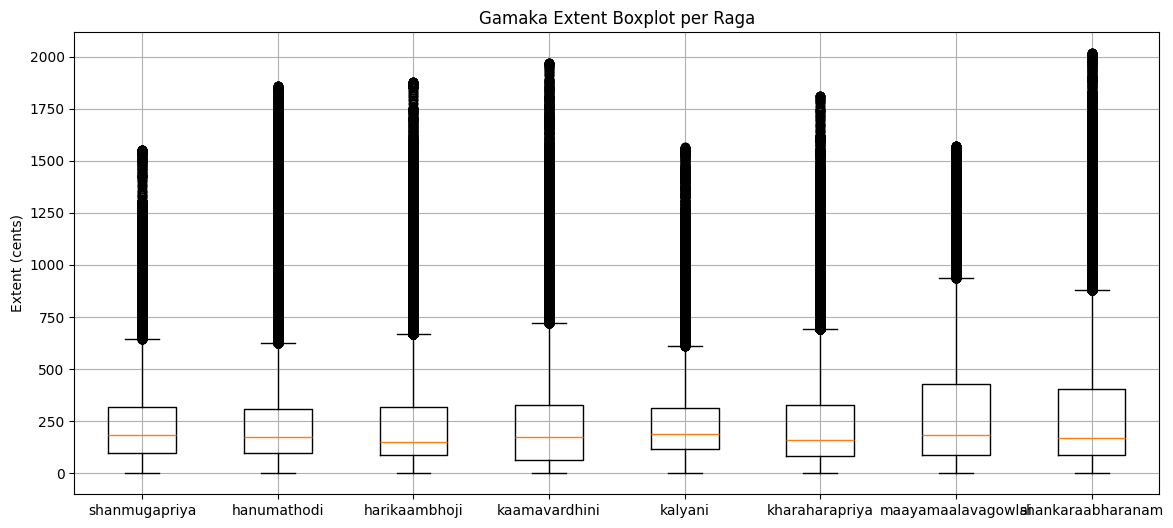

In [18]:
plt.figure(figsize=(14,6))

data = []
labels = []

for raga in df["raga"].unique():
    ext_vals = []
    for seq in df[df.raga == raga]["gamaka_extent"]:
        arr = safe_array(seq)
        ext_vals.extend(arr[~np.isnan(arr)])

    data.append(ext_vals)
    labels.append(raga)

plt.boxplot(data, labels=labels)
plt.title("Gamaka Extent Boxplot per Raga")
plt.ylabel("Extent (cents)")
plt.grid(True)
plt.show()


### 3. Spectral Analysis

#### Mean Mel-Spectrogram
This shows which frequency bands are strong for a raga.

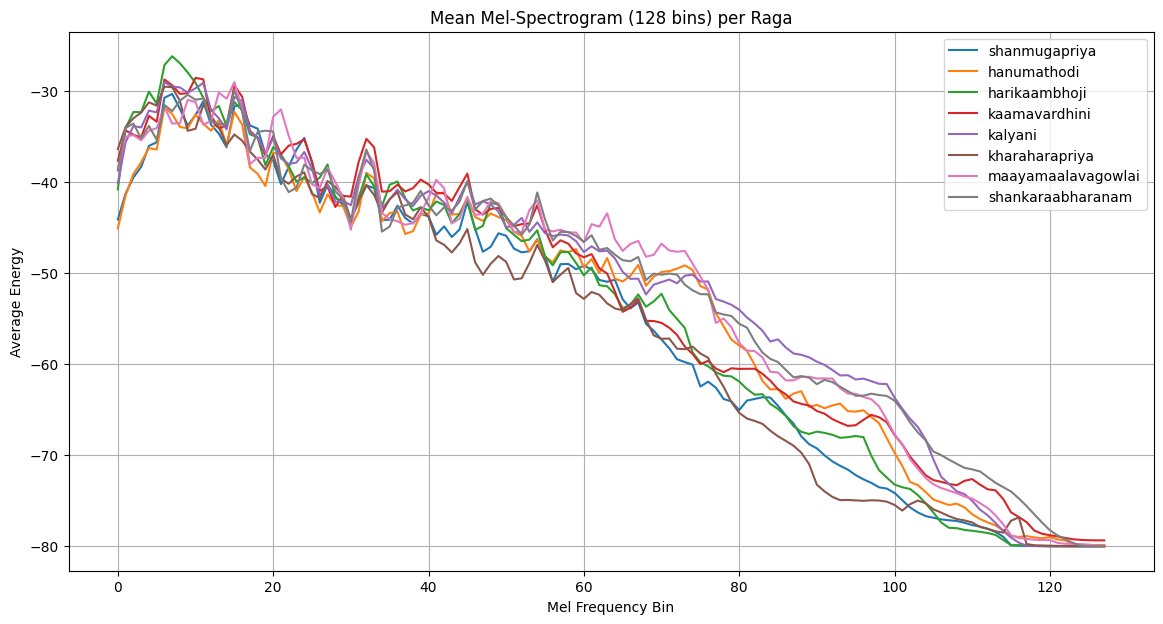

In [19]:
plt.figure(figsize=(14,7))

for raga in df["raga"].unique():
    specs = []
    for seq in df[df.raga == raga]["mel_spectrogram_128"]:
        arr = safe_array(seq)
        if arr.ndim == 2:
            specs.append(arr)

    # average across time → (128,)
    avg_spec = np.mean([np.mean(s, axis=1) for s in specs], axis=0)
    plt.plot(avg_spec, label=raga)

plt.title("Mean Mel-Spectrogram (128 bins) per Raga")
plt.xlabel("Mel Frequency Bin")
plt.ylabel("Average Energy")
plt.legend()
plt.grid(True)
plt.show()


#### Mel Heat Map
Helps Visualize Visual Spectral Shape Difference

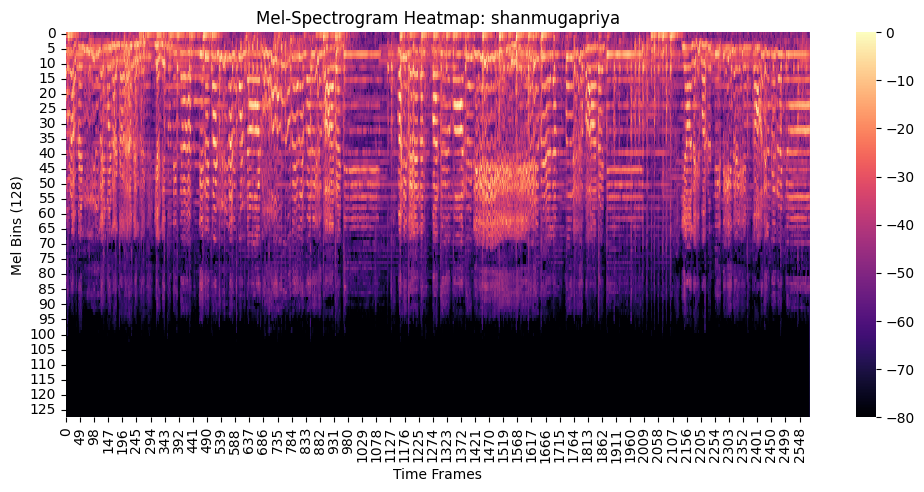

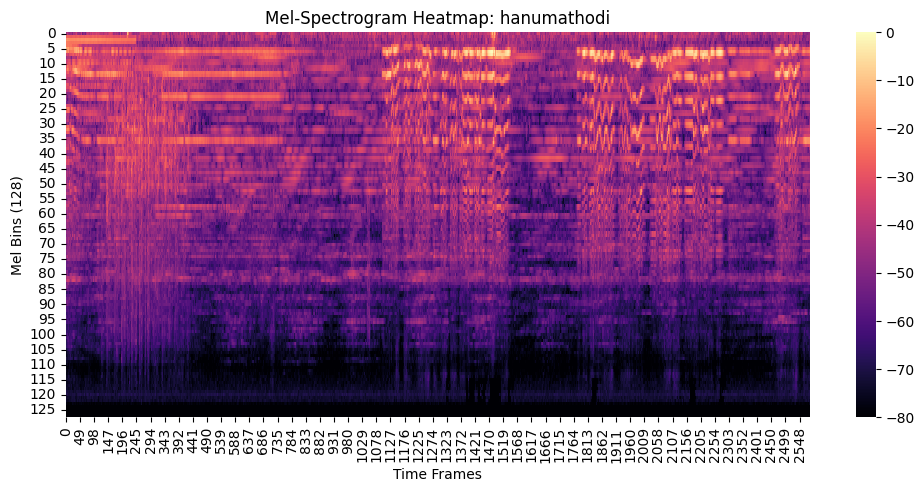

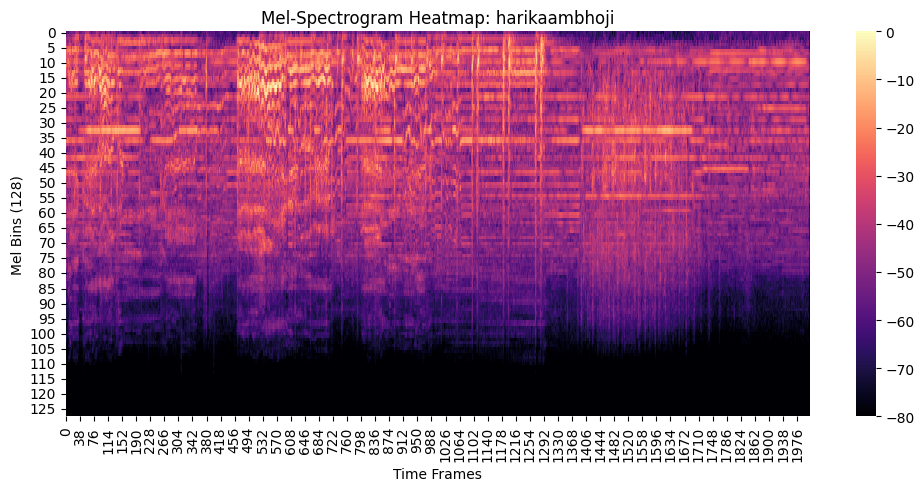

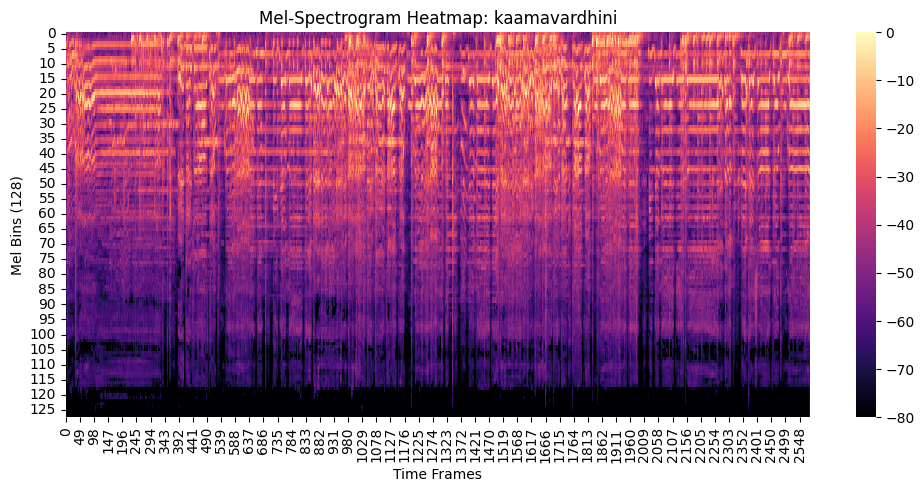

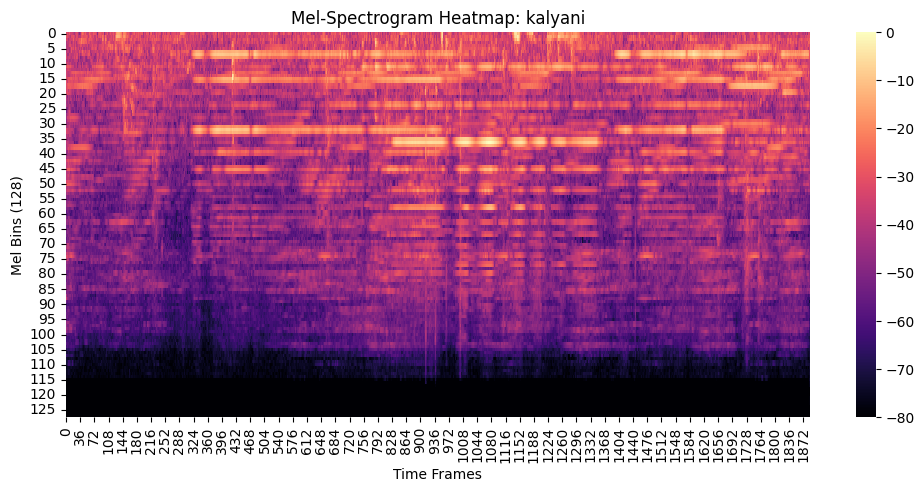

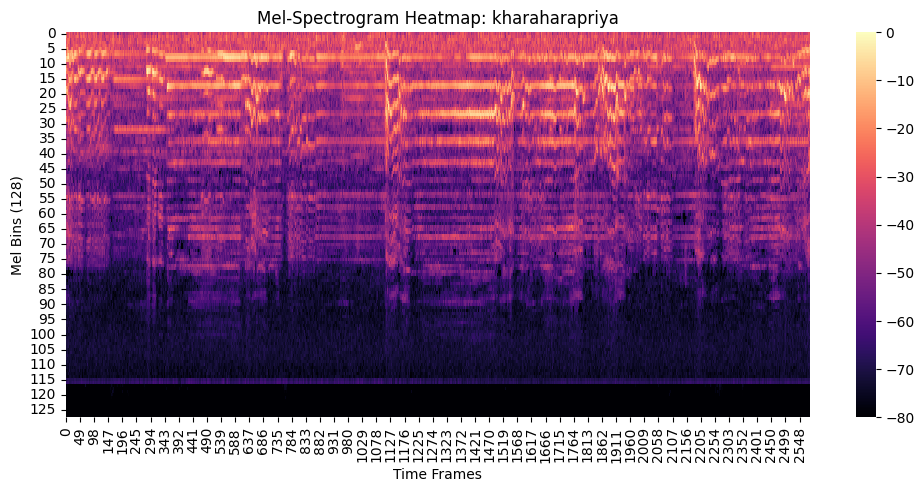

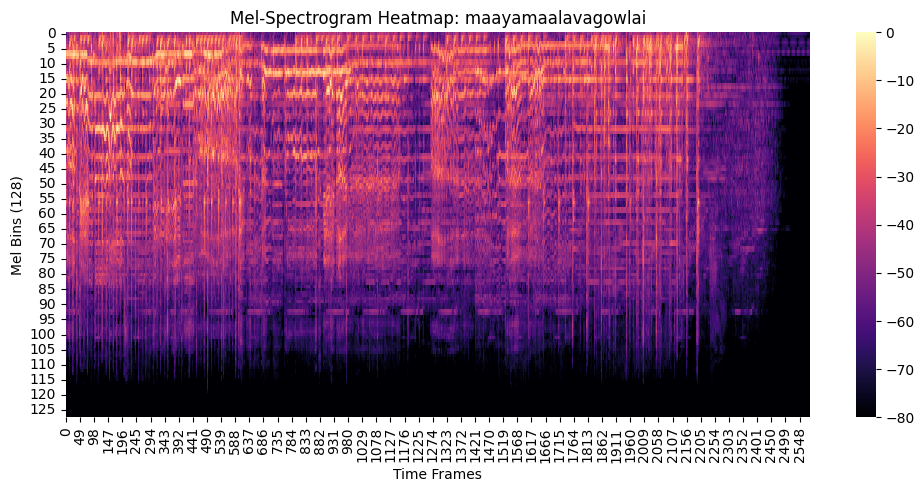

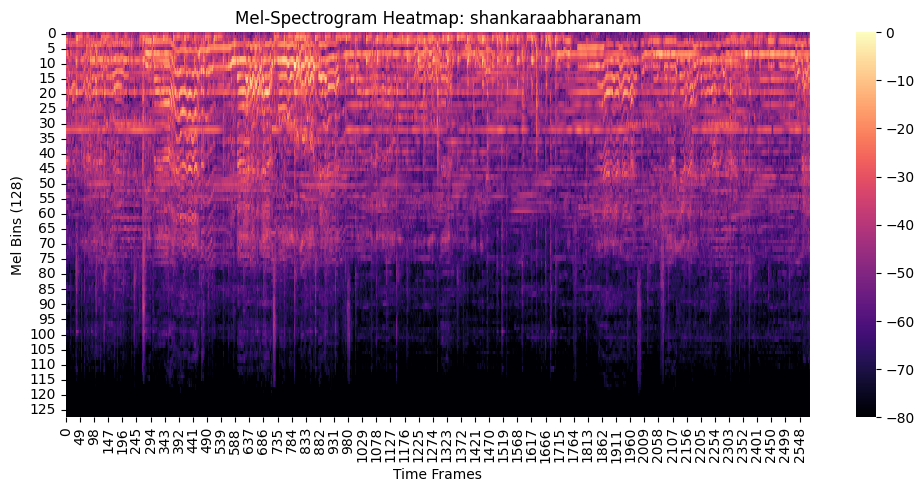

In [20]:
import random

for raga in df["raga"].unique():
    row = df[df.raga == raga].sample(1).iloc[0]
    mel = safe_array(row["mel_spectrogram_128"])

    plt.figure(figsize=(12,5))
    sns.heatmap(mel, cmap="magma", cbar=True)
    plt.title(f"Mel-Spectrogram Heatmap: {raga}")
    plt.xlabel("Time Frames")
    plt.ylabel("Mel Bins (128)")
    plt.show()


#### Mean MFCC per Raga
MFCC Capture Timbre, vowel formants, voice color

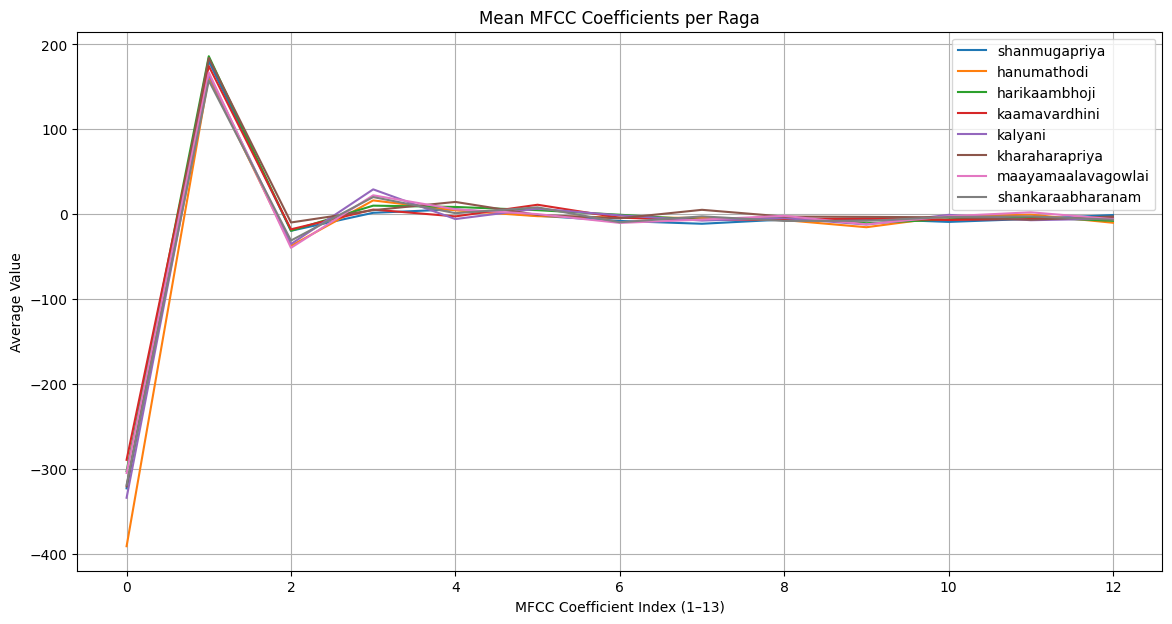

In [22]:
plt.figure(figsize=(14,7))

for raga in df["raga"].unique():
    coeffs = []
    for seq in df[df.raga == raga]["mfcc"]:
        arr = safe_array(seq)
        if arr.ndim == 2:
            coeffs.append(arr)

    # average across time → (13,)
    avg_mfcc = np.mean([np.mean(c, axis=1) for c in coeffs], axis=0)
    plt.plot(avg_mfcc, label=raga)

plt.title("Mean MFCC Coefficients per Raga")
plt.xlabel("MFCC Coefficient Index (1–13)")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)
plt.show()


#### Mean MFCC Heatmap
Useful for Visual Pattern Recognition

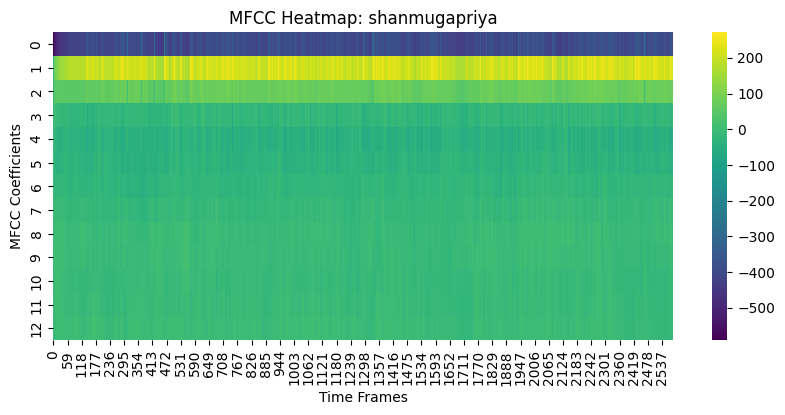

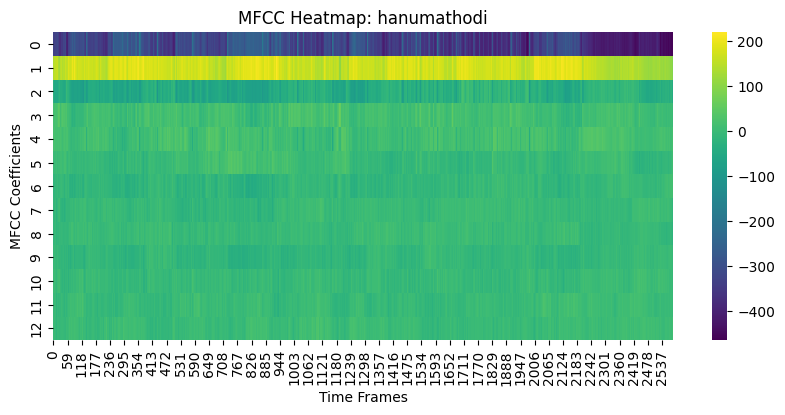

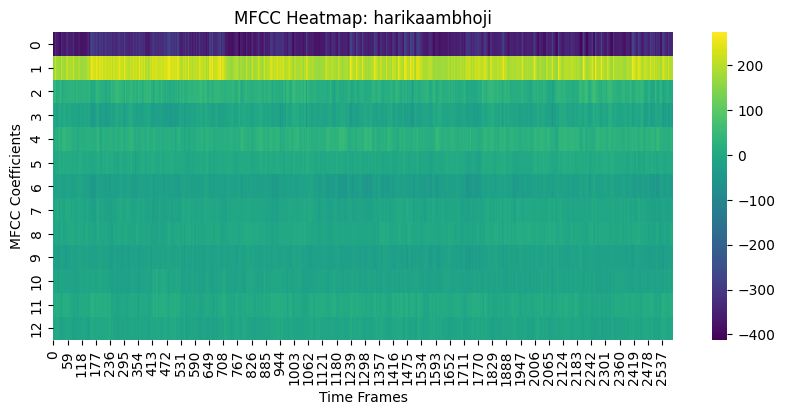

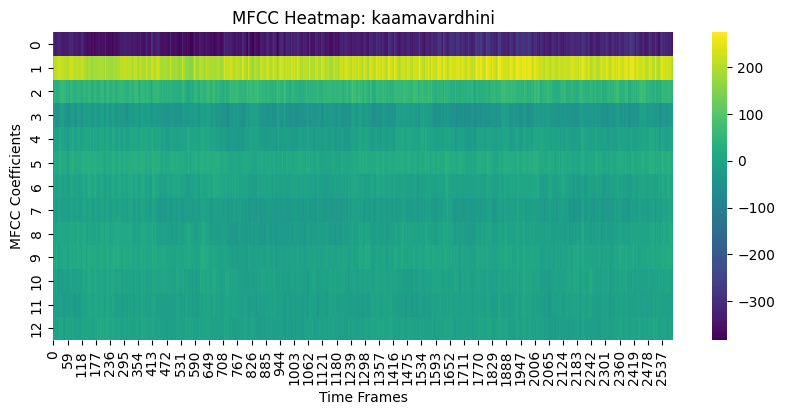

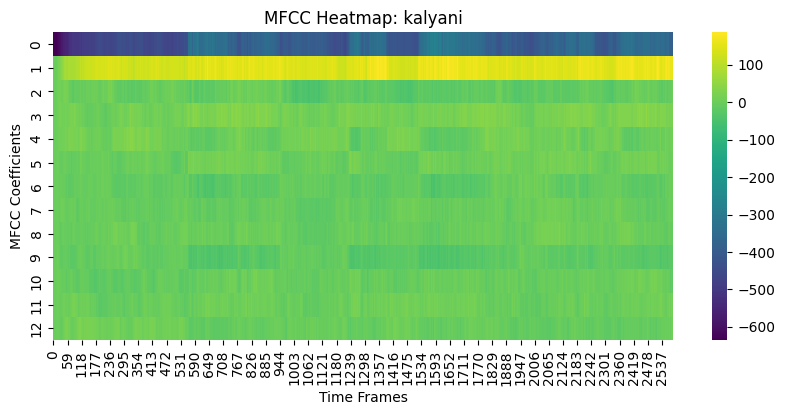

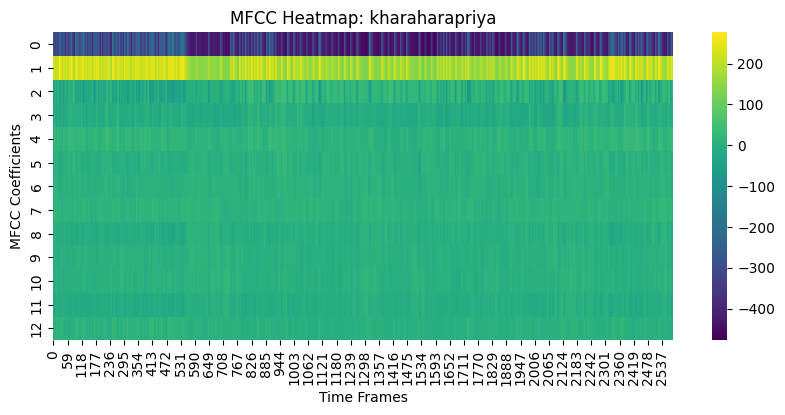

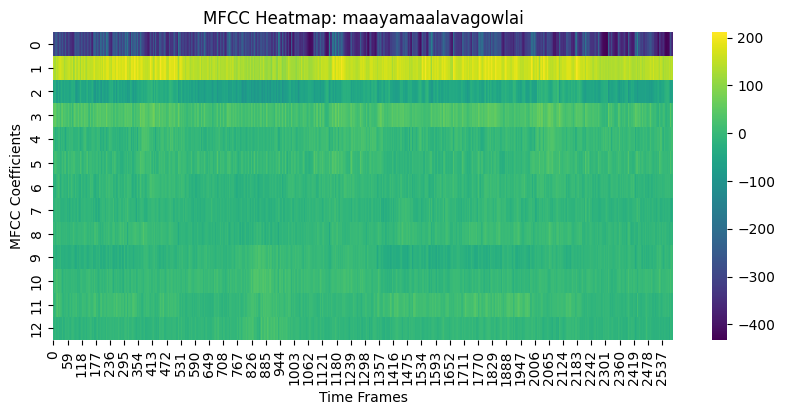

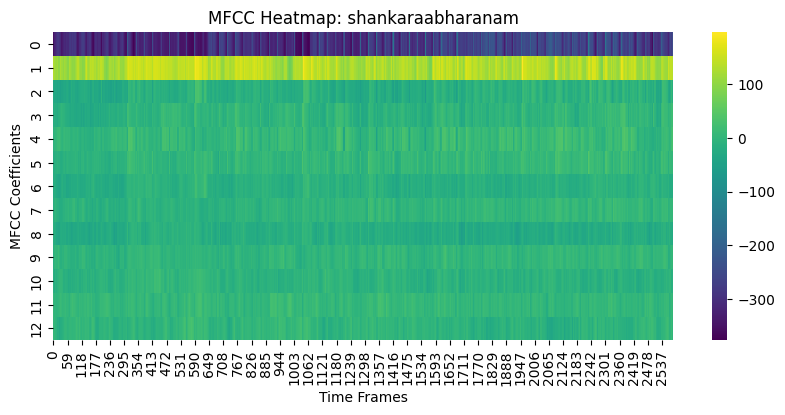

In [23]:
for raga in df["raga"].unique():
    row = df[df.raga == raga].sample(1).iloc[0]
    mfcc = safe_array(row["mfcc"])

    plt.figure(figsize=(10,4))
    sns.heatmap(mfcc, cmap="viridis", cbar=True)
    plt.title(f"MFCC Heatmap: {raga}")
    plt.xlabel("Time Frames")
    plt.ylabel("MFCC Coefficients")
    plt.show()


#### Chroma Mean profile per Raga
Reveals Swara Emphasis

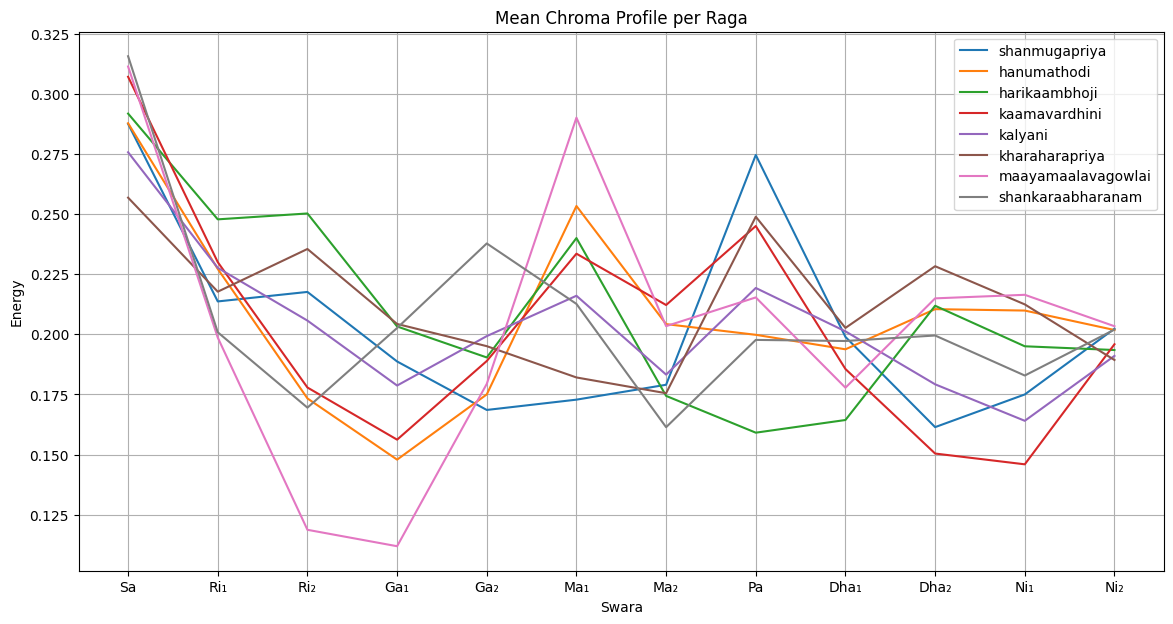

In [24]:
chroma_swara_labels = [
    "Sa", "Ri₁", "Ri₂", "Ga₁", "Ga₂", "Ma₁",
    "Ma₂", "Pa", "Dha₁", "Dha₂", "Ni₁", "Ni₂"
]

plt.figure(figsize=(14,7))

for raga in df["raga"].unique():
    chromas = []
    for seq in df[df.raga == raga]["chroma_12"]:
        arr = safe_array(seq)
        if arr.ndim == 2:
            chromas.append(arr)

    # average across time → (12,)
    avg_chroma = np.mean([np.mean(c, axis=1) for c in chromas], axis=0)
    plt.plot(avg_chroma, label=raga)

plt.title("Mean Chroma Profile per Raga")
plt.xlabel("Swara")
plt.ylabel("Energy")
plt.xticks(range(12), chroma_swara_labels)
plt.legend()
plt.grid(True)
plt.show()


#### Chroma Heat map
Swara usage across time

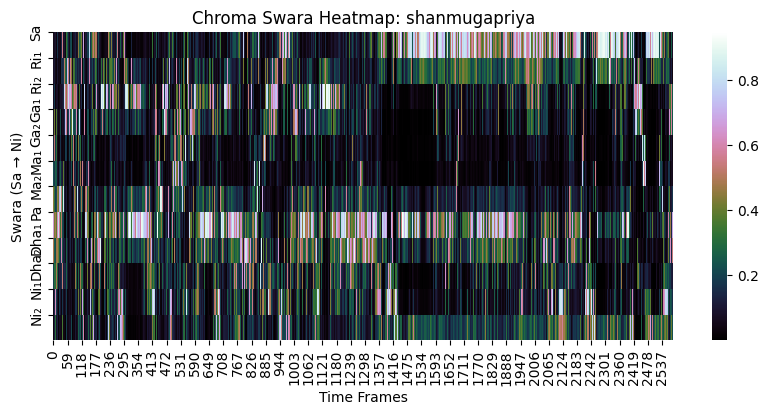

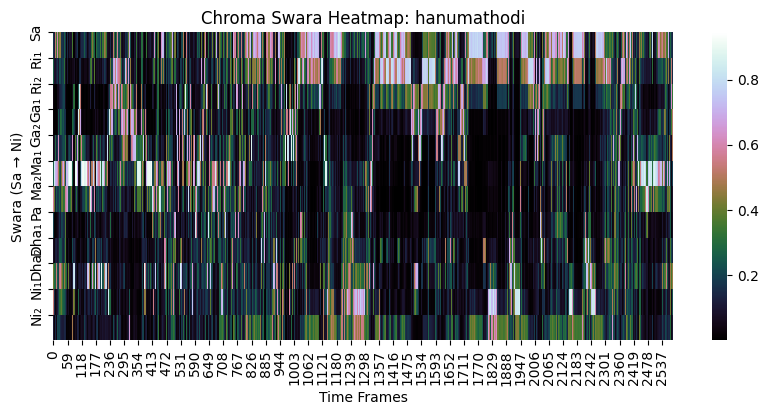

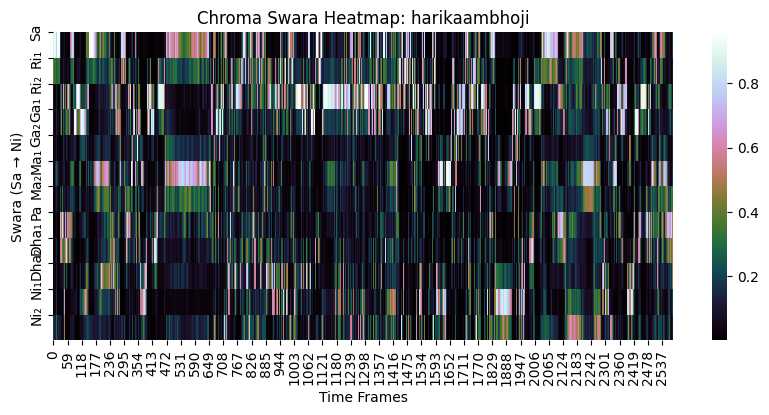

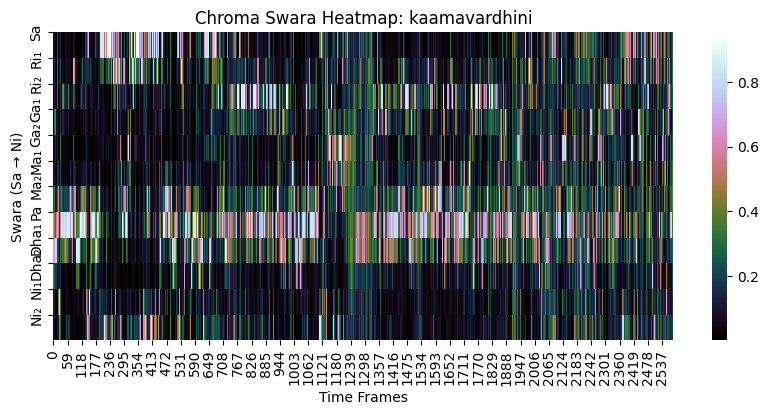

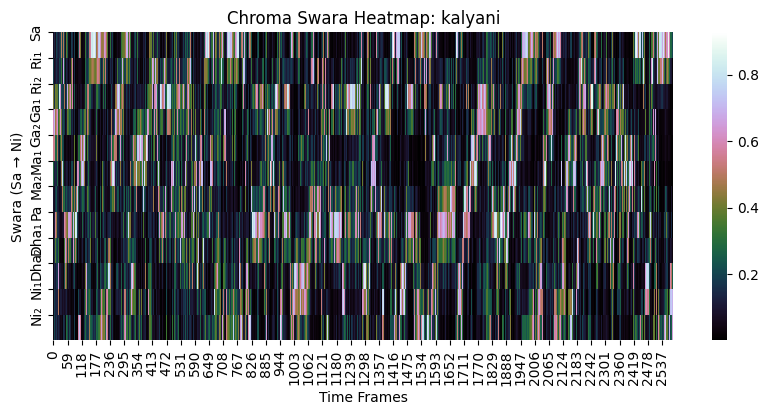

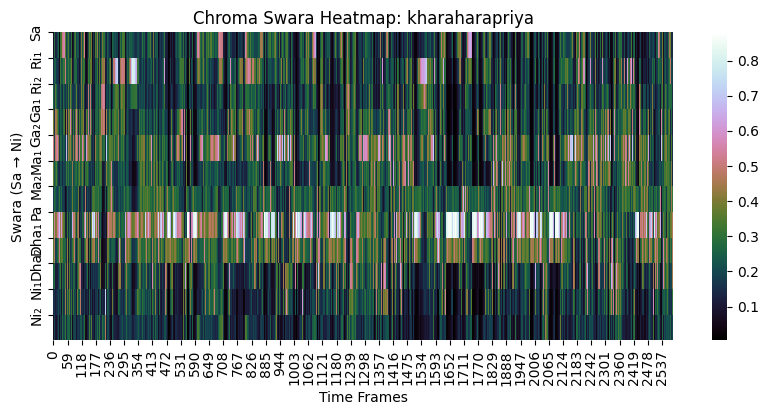

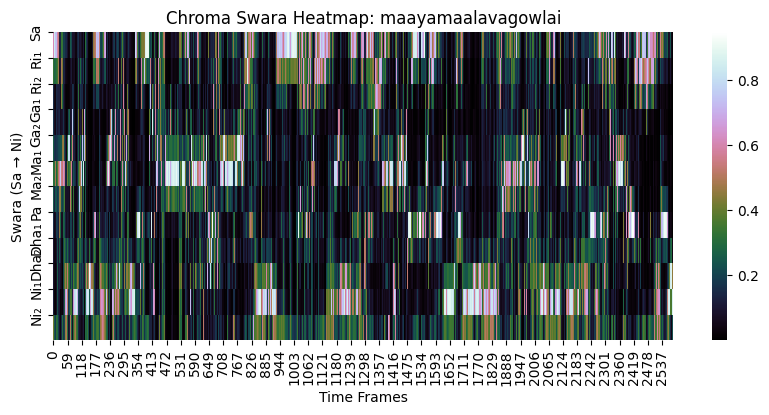

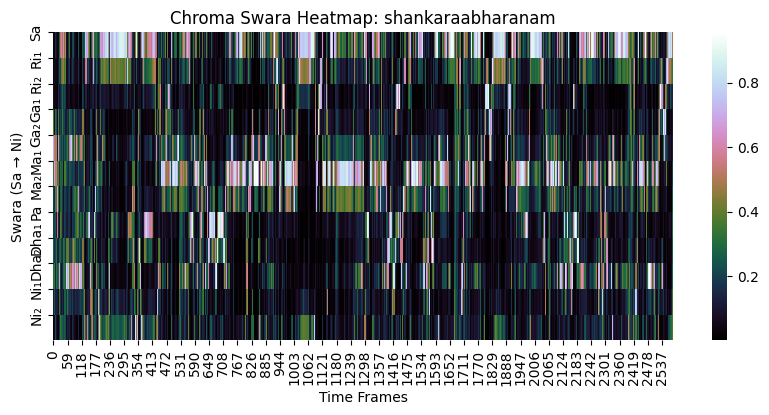

In [25]:

for raga in df["raga"].unique():
    row = df[df.raga == raga].sample(1).iloc[0]
    chroma = safe_array(row["chroma_12"])

    plt.figure(figsize=(10,4))
    sns.heatmap(chroma, cmap="cubehelix", cbar=True)
    plt.title(f"Chroma Swara Heatmap: {raga}")
    plt.xlabel("Time Frames")
    plt.ylabel("Swara (Sa → Ni)")
    plt.yticks(range(12), chroma_swara_labels)
    plt.show()


#### Spectral Summary Table

In [26]:
summary = []

for raga in df["raga"].unique():
    mel_energy, mfcc_energy, chroma_energy = [], [], []

    for _, row in df[df.raga == raga].iterrows():
        mel = safe_array(row["mel_spectrogram_128"])
        mfcc = safe_array(row["mfcc"])
        chroma = safe_array(row["chroma_12"])

        if mel.ndim == 2:
            mel_energy.append(np.mean(mel))
        if mfcc.ndim == 2:
            mfcc_energy.append(np.mean(mfcc))
        if chroma.ndim == 2:
            chroma_energy.append(np.mean(chroma))

    summary.append({
        "raga": raga,
        "mean_mel_energy": np.mean(mel_energy),
        "mean_mfcc_energy": np.mean(mfcc_energy),
        "mean_chroma_energy": np.mean(chroma_energy)
    })

spectral_summary_df = pd.DataFrame(summary)
spectral_summary_df


raga  mean_mel_energy  mean_mfcc_energy  mean_chroma_energy
0       shanmugapriya       -55.902626        -15.445426            0.203369
1         hanumathodi       -53.951141        -22.226583            0.207067
2       harikaambhoji       -54.533390        -11.471755            0.210172
3       kaamavardhini       -53.086082        -11.904969            0.202411
4             kalyani       -51.826111        -16.210077            0.203447
5      kharaharapriya       -56.333874        -11.110077            0.212413
6  maayamaalavagowlai       -52.231514        -14.118517            0.203473
7   shankaraabharanam       -51.828201        -15.449142            0.206663

### 4. Raga Features Correlation

In [27]:

raga_feature_rows = []

for raga in df["raga"].unique():
    subset = df[df.raga == raga]

    # containers
    f0_vals, cents_vals, interval_vals = [], [], []
    der_vals, mod_vals, extent_vals = [], [], []
    mel_energy_vals, mfcc_means, chroma_means = [], [], []

    for _, row in subset.iterrows():
        # --- 1. pitch features ---
        f0 = safe_array(row["f0_hz"])
        cents = safe_array(row["f0_cents"])
        intervals = safe_array(row["interval_sequence"])
        der = safe_array(row["f0_derivative"])
        mod = safe_array(row["modulation_index"])
        extent = safe_array(row["gamaka_extent"])

        f0_vals.extend(f0[~np.isnan(f0)])
        cents_vals.extend(cents[~np.isnan(cents)])
        interval_vals.extend(intervals[~np.isnan(intervals)])
        der_vals.extend(der[~np.isnan(der)])
        mod_vals.extend(mod[~np.isnan(mod)])
        extent_vals.extend(extent[~np.isnan(extent)])

        # --- 2. spectral features ---
        mel = safe_array(row["mel_spectrogram_128"])
        if mel.ndim == 2:
            mel_energy_vals.append(np.mean(mel))

        mfcc = safe_array(row["mfcc"])
        if mfcc.ndim == 2:
            mfcc_means.append(np.mean(mfcc, axis=1))  # (13,)

        chroma = safe_array(row["chroma_12"])
        if chroma.ndim == 2:
            chroma_means.append(np.mean(chroma, axis=1))  # (12,)

    # aggregate into one vector
    raga_feature_rows.append({
        "raga": raga,
        "mean_f0": np.mean(f0_vals),
        "std_f0": np.std(f0_vals),
        "mean_cents": np.mean(cents_vals),
        "std_cents": np.std(cents_vals),
        "mean_interval": np.mean(interval_vals),
        "mean_derivative": np.mean(der_vals),
        "mean_modulation": np.mean(mod_vals),
        "mean_extent": np.mean(extent_vals),
        "mel_energy": np.mean(mel_energy_vals),
        **{f"mfcc_{i+1}": np.mean([m[i] for m in mfcc_means]) for i in range(13)},
        **{f"chroma_{i+1}": np.mean([c[i] for c in chroma_means]) for i in range(12)},
    })

raga_feature_df = pd.DataFrame(raga_feature_rows)
raga_feature_df


raga     mean_f0      std_f0   mean_cents   std_cents  \
0       shanmugapriya  251.783891   84.617497  1016.405173  689.599170   
1         hanumathodi  237.628607  107.249617   859.323866  794.599360   
2       harikaambhoji  222.145095  112.490847   714.273689  837.894377   
3       kaamavardhini  242.229531  106.145482   895.967243  793.288084   
4             kalyani  229.624331   84.919508   844.751287  697.803869   
5      kharaharapriya  238.248658  126.882470   802.805663  927.993744   
6  maayamaalavagowlai  271.506910  136.512556  1049.672585  883.199845   
7   shankaraabharanam  248.790684  154.917325   826.685811  987.188166   

   mean_interval  mean_derivative  mean_modulation  mean_extent  mel_energy  \
0      -0.631596        -0.081360     3.888741e+05   256.799311  -55.902626   
1      -0.701516        -0.070381     1.081233e+06   254.291203  -53.951141   
2      -0.194457         0.001607     1.408773e+05   246.717386  -54.533390   
3      -0.811195        -0.053138     5.155394e+05   254.850623  -53.086082   
4      -1.126900        -0.123754     2.288227e+06   250.383085  -51.826111   
5      -0.753274        -0.084929     2.387077e+05   245.641196  -56.333874   
6      -0.775988        -0.045856     7.598726e+05   278.629542  -52.231514   
7      -0.931456        -0.081795     1.562097e+06   273.276221  -51.828201   

   ...  chroma_3  chroma_4  chroma_5  chroma_6  chroma_7  chroma_8  chroma_9  \
0  ...  0.217654  0.188727  0.168564  0.172848  0.179044  0.274601  0.198939   
1  ...  0.173364  0.147903  0.175030  0.253396  0.204268  0.199817  0.193792   
2  ...  0.250287  0.203296  0.190396  0.240061  0.174411  0.159116  0.164386   
3  ...  0.177902  0.156213  0.188925  0.233560  0.212211  0.245062  0.185595   
4  ...  0.205730  0.178719  0.199278  0.216059  0.183268  0.219298  0.201255   
5  ...  0.235515  0.204335  0.195095  0.182081  0.175523  0.248935  0.202689   
6  ...  0.118720  0.111889  0.179405  0.290131  0.203423  0.215371  0.177826   
7  ...  0.169525  0.202649  0.237820  0.212670  0.161393  0.197700  0.197249   

   chroma_10  chroma_11  chroma_12  
0   0.161421   0.175014   0.202357  
1   0.210491   0.209906   0.201815  
2   0.211902   0.195047   0.193493  
3   0.150438   0.145954   0.195893  
4   0.179235   0.164053   0.191054  
5   0.228346   0.212469   0.189350  
6   0.214982   0.216457   0.203398  
7   0.199529   0.182885   0.201975  

[8 rows x 35 columns]

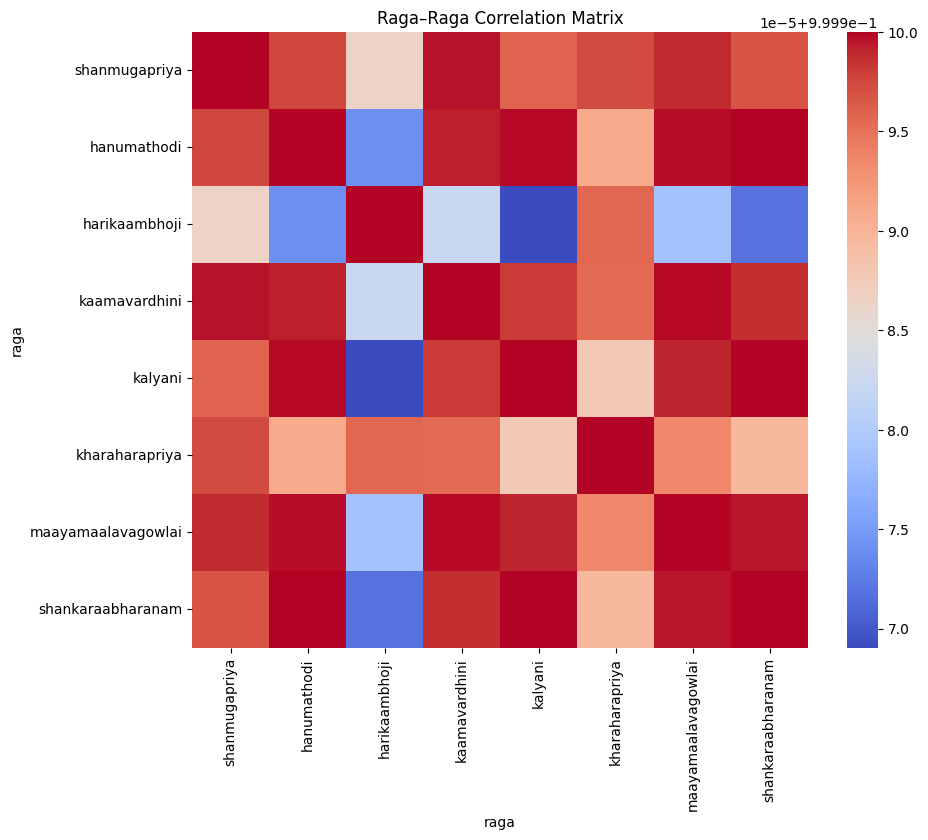

In [31]:
# 1️⃣ Remove raga column & set it as index
raga_mat = raga_feature_df.set_index("raga")

# 2️⃣ Compute Raga × Raga correlation
# (transpose → columns become features → corr across ragas)
raga_corr = raga_mat.T.corr()

# 3️⃣ Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    raga_corr,
    # annot=True,
    cmap="coolwarm",
    xticklabels=raga_corr.index,
    yticklabels=raga_corr.index,
    square=True
)
plt.title("Raga–Raga Correlation Matrix")
plt.show()
